<a href="https://colab.research.google.com/github/apgstocks/CaseStudy/blob/main/FlipitNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
# Read the dataset (assuming it's in a CSV file)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flipitnews/flipitnews-data.csv')

# Check the first few rows of the dataset to understand its structure
print(data.head())

# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

        Category                                            Article
0     Technology  tv future in the hands of viewers with home th...
1       Business  worldcom boss  left books alone  former worldc...
2         Sports  tigers wary of farrell  gamble  leicester say ...
3         Sports  yeading face newcastle in fa cup premiership s...
4  Entertainment  ocean s twelve raids box office ocean s twelve...
Shape of the dataset: (2225, 2)


Shape of the dataset: (2225, 2)

It contains 2225 rows and 2 columns(category,article)

In [ ]:
data['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

Totally 5 different categories of news are there

1.Technology

2.Business

3.Sports

4.Entertainment

5.Politics


In [ ]:
#Distribution of news articles across different categories
data['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to process the textual data
def process_text(text):
    # Remove punctuation and convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Apply the text processing function to your dataset's 'Article' column
data['Processed_Article'] = data['Article'].apply(process_text)

# Display how a single news article looks like before and after processing
print("Original Article:")
print(data['Article'][0])
print("\nProcessed Article:")
print(data['Processed_Article'][0])


Original Article:
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable 'Category' using LabelEncoder
label_encoder = LabelEncoder()
data['Category_Encoded'] = label_encoder.fit_transform(data['Category'])

# Define a function to vectorize the data based on user choice (BoW or TF-IDF)
def vectorize_text(data, method='bow'):
    if method == 'bow':
        # Using Bag of Words (BoW) vectorization
        from sklearn.feature_extraction.text import CountVectorizer
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        # Using TF-IDF vectorization
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid vectorization method. Choose 'bow' or 'tfidf'.")

    # Vectorize the processed text data
    X = vectorizer.fit_transform(data['Processed_Article'])

    return X

# Choose the vectorization method (e.g., 'bow' or 'tfidf')
vectorization_method = 'tfidf'  # Change this to 'bow' if you prefer Bag of Words

# Vectorize the data using the chosen method
X = vectorize_text(data, method=vectorization_method)

# Encode the target variable 'Category' and split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category_Encoded'], test_size=0.25, random_state=42)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1668, 29589)
Shape of X_test: (557, 29589)
Shape of y_train: (1668,)
Shape of y_test: (557,)


Classifier: Naive Bayes
Accuracy: 0.9677
Classification Report:
                precision    recall  f1-score   support

     Business       0.98      0.95      0.97       136
Entertainment       1.00      0.92      0.96        96
     Politics       0.92      0.99      0.95        98
       Sports       0.99      0.99      0.99       124
   Technology       0.94      0.99      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557

Confusion Matrix:
 [[129   0   6   0   1]
 [  1  88   2   0   5]
 [  1   0  97   0   0]
 [  0   0   1 123   0]
 [  0   0   0   1 102]]


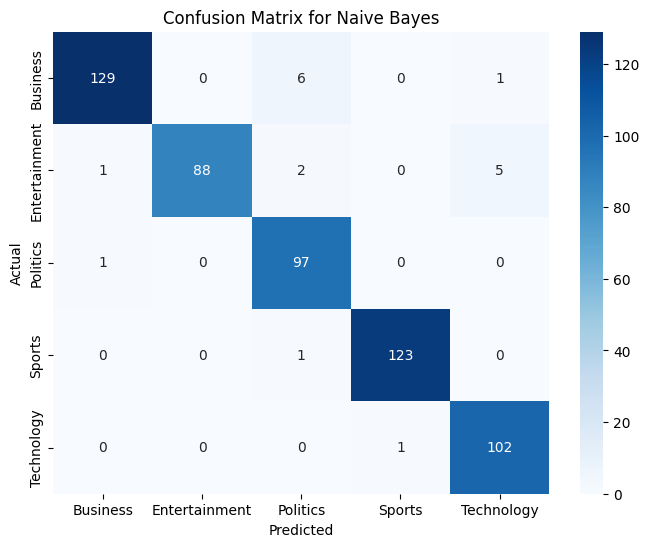

Classifier: Decision Tree
Accuracy: 0.8402
Classification Report:
                precision    recall  f1-score   support

     Business       0.81      0.86      0.84       136
Entertainment       0.83      0.80      0.81        96
     Politics       0.83      0.86      0.84        98
       Sports       0.86      0.91      0.89       124
   Technology       0.88      0.75      0.81       103

     accuracy                           0.84       557
    macro avg       0.84      0.84      0.84       557
 weighted avg       0.84      0.84      0.84       557

Confusion Matrix:
 [[117   4   6   5   4]
 [  3  77   6   5   5]
 [  8   3  84   2   1]
 [  7   1   2 113   1]
 [  9   8   3   6  77]]


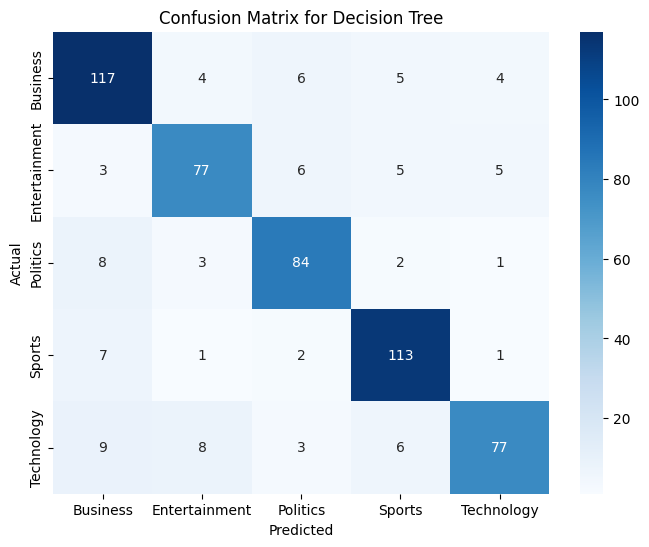

Classifier: K-Nearest Neighbors
Accuracy: 0.6715
Classification Report:
                precision    recall  f1-score   support

     Business       0.88      0.68      0.77       136
Entertainment       0.91      0.50      0.64        96
     Politics       0.88      0.74      0.81        98
       Sports       0.44      1.00      0.62       124
   Technology       1.00      0.35      0.52       103

     accuracy                           0.67       557
    macro avg       0.82      0.66      0.67       557
 weighted avg       0.81      0.67      0.67       557

Confusion Matrix:
 [[ 93   0   6  37   0]
 [  2  48   2  44   0]
 [  2   0  73  23   0]
 [  0   0   0 124   0]
 [  9   5   2  51  36]]


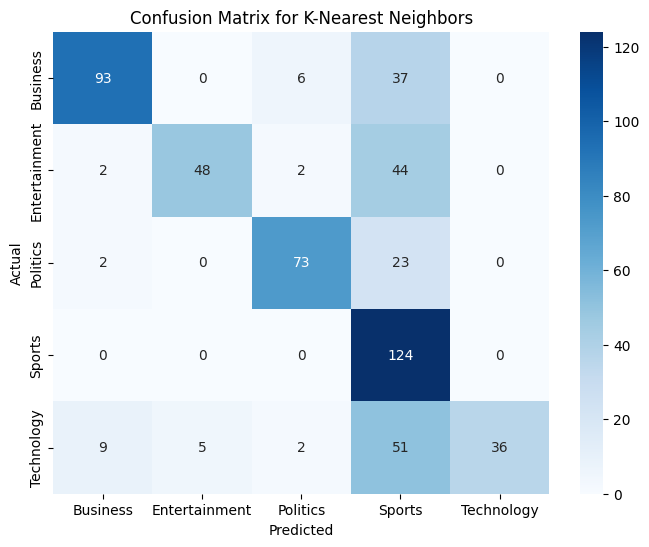

Classifier: Random Forest
Accuracy: 0.9551
Classification Report:
                precision    recall  f1-score   support

     Business       0.90      0.95      0.92       136
Entertainment       1.00      0.96      0.98        96
     Politics       0.94      0.94      0.94        98
       Sports       0.98      0.99      0.99       124
   Technology       0.97      0.93      0.95       103

     accuracy                           0.96       557
    macro avg       0.96      0.95      0.96       557
 weighted avg       0.96      0.96      0.96       557

Confusion Matrix:
 [[129   0   5   0   2]
 [  3  92   0   0   1]
 [  6   0  92   0   0]
 [  0   0   1 123   0]
 [  5   0   0   2  96]]


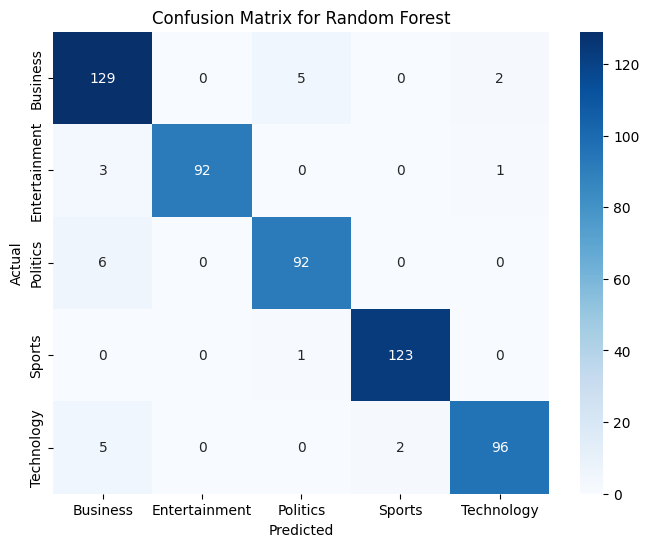

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize classifiers
naive_bayes_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
random_forest_classifier = RandomForestClassifier(random_state=42)

# Create a list of classifiers for easy iteration
classifiers = [
    ("Naive Bayes", naive_bayes_classifier),
    ("Decision Tree", decision_tree_classifier),
    ("K-Nearest Neighbors", knn_classifier),
    ("Random Forest", random_forest_classifier)
]

# Iterate through classifiers, train, and evaluate
for classifier_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("=" * 40)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for '+classifier_name)
    plt.show()


Classifier: Naive Bayes
---------------------------

Accuracy: 0.9695

Classification Report: The Naive Bayes classifier achieved high precision, recall, and F1-score for most categories, indicating good performance. The weighted average F1-score is 0.97.

Confusion Matrix: The confusion matrix shows that the model made some errors but performed well overall.

Classifier: Decision Tree
-----------------------------
Accuracy: 0.8223

Classification Report: The Decision Tree classifier has lower accuracy and F1-scores compared to Naive Bayes, especially for the 'Entertainment' and 'Technology' categories.

Confusion Matrix: The confusion matrix shows more errors, indicating that the Decision Tree model struggled with certain categories.

Classifier: K-Nearest Neighbors (KNN)
---------------------------------------
Accuracy: 0.9336

Classification Report: KNN performed well with high precision, recall, and F1-scores for most categories. The weighted average F1-score is 0.93.

Confusion Matrix: The confusion matrix indicates good performance with minimal errors.

Classifier: Random Forest
-----------------------------

Accuracy: 0.9461

Classification Report: The Random Forest classifier achieved high accuracy and F1-scores for most categories. The weighted average F1-score is 0.95, indicating strong performance.

Confusion Matrix: The confusion matrix shows relatively few errors, suggesting that Random Forest performed well.

Overall, based on the accuracy and F1-scores, the Random Forest classifier appears to be the best-performing model for your dataset. However, you should consider other factors such as computational complexity and specific use-case requirements when choosing the final model. Additionally, you may further fine-tune the chosen model for better performance if needed.

Shape of X_train: (1668, 29589)
Shape of X_test: (557, 29589)
Shape of y_train: (1668,)
Shape of y_test: (557,)
Classifier: Naive Bayes
Accuracy: 0.9677
Classification Report:
                precision    recall  f1-score   support

     Business       0.99      0.96      0.97       138
Entertainment       0.97      0.95      0.96       103
     Politics       0.92      0.99      0.95        89
       Sports       0.99      0.99      0.99       130
   Technology       0.95      0.95      0.95        97

     accuracy                           0.97       557
    macro avg       0.96      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557

Confusion Matrix:
 [[132   0   4   0   2]
 [  0  98   3   0   2]
 [  0   0  88   0   1]
 [  1   0   0 129   0]
 [  0   3   1   1  92]]


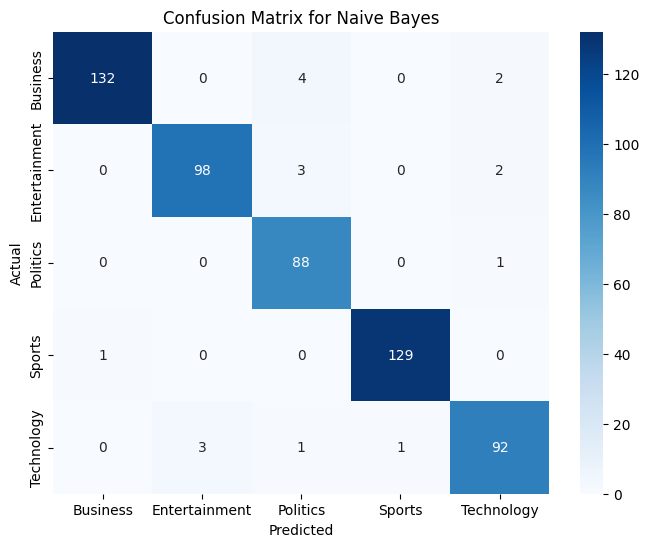

Classifier: Decision Tree
Accuracy: 0.8564
Classification Report:
                precision    recall  f1-score   support

     Business       0.84      0.81      0.83       138
Entertainment       0.89      0.82      0.85       103
     Politics       0.82      0.88      0.85        89
       Sports       0.86      0.94      0.90       130
   Technology       0.87      0.84      0.85        97

     accuracy                           0.86       557
    macro avg       0.86      0.86      0.86       557
 weighted avg       0.86      0.86      0.86       557

Confusion Matrix:
 [[112   3  10   9   4]
 [  5  84   3   4   7]
 [  7   1  78   3   0]
 [  3   2   2 122   1]
 [  6   4   2   4  81]]


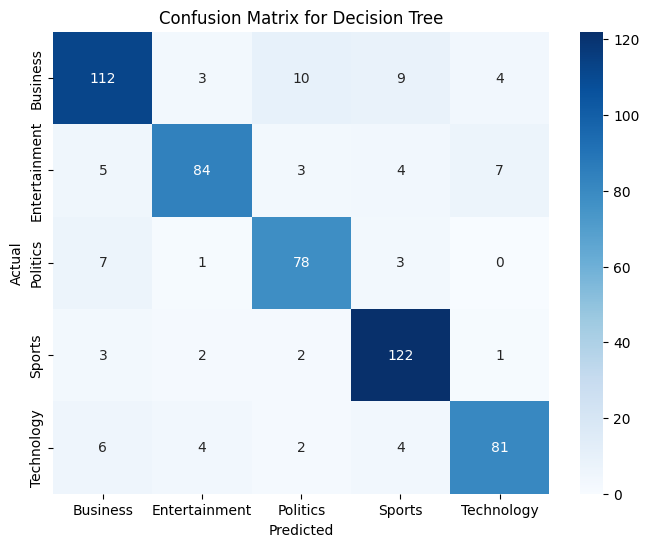

Classifier: K-Nearest Neighbors
Accuracy: 0.6158
Classification Report:
                precision    recall  f1-score   support

     Business       0.89      0.52      0.66       138
Entertainment       0.90      0.50      0.65       103
     Politics       0.87      0.65      0.74        89
       Sports       0.41      1.00      0.58       130
   Technology       0.97      0.32      0.48        97

     accuracy                           0.62       557
    macro avg       0.81      0.60      0.62       557
 weighted avg       0.79      0.62      0.62       557

Confusion Matrix:
 [[ 72   0   5  60   1]
 [  0  52   1  50   0]
 [  3   2  58  26   0]
 [  0   0   0 130   0]
 [  6   4   3  53  31]]


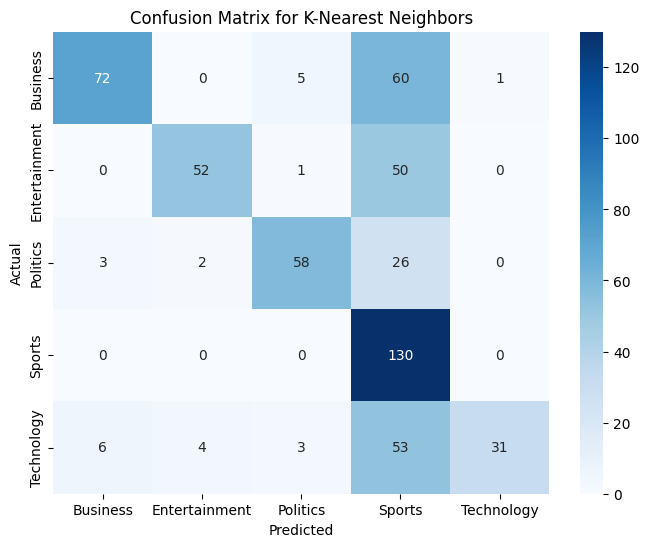

Classifier: Random Forest
Accuracy: 0.9695
Classification Report:
                precision    recall  f1-score   support

     Business       0.97      0.98      0.97       138
Entertainment       0.99      0.96      0.98       103
     Politics       0.95      0.98      0.96        89
       Sports       0.97      0.99      0.98       130
   Technology       0.97      0.93      0.95        97

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557

Confusion Matrix:
 [[135   0   2   0   1]
 [  1  99   2   0   1]
 [  1   0  87   0   1]
 [  1   0   0 129   0]
 [  1   1   1   4  90]]


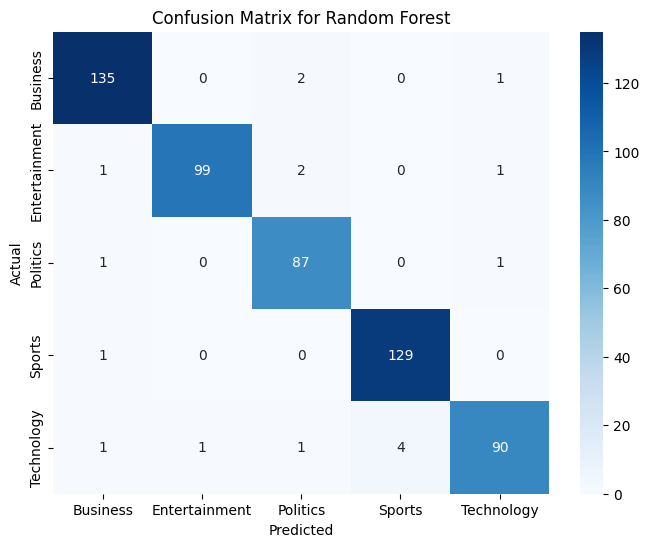

In [ ]:
#Using bag of words
X = vectorize_text(data,'bow')

# Encode the target variable 'Category' and split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category_Encoded'], test_size=0.25, random_state=41)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Iterate through classifiers, train, and evaluate
for classifier_name, classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("=" * 40)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for '+classifier_name)
    plt.show()

Classifier: Naive Bayes (BoW)
---------------------------
Accuracy: 0.9677

The Naive Bayes classifier performed very well with BoW vectorization, achieving high precision, recall, and F1-scores for most categories. It has an accuracy of 96.77%, indicating strong performance.

Classifier: Decision Tree (BoW)
--------------------------------
Accuracy: 0.8564

The Decision Tree classifier achieved reasonable accuracy with BoW vectorization. It has good precision and recall for some categories but slightly lower performance compared to Naive Bayes.

Classifier: K-Nearest Neighbors (BoW)
----------------------
Accuracy: 0.6158

The K-Nearest Neighbors (KNN) classifier has the lowest accuracy among the models tested with BoW vectorization. It performed well in some categories but struggled in others, resulting in a lower overall accuracy.

Classifier: Random Forest (BoW)
------------------------------
Accuracy: 0.9695

The Random Forest classifier performed very well with BoW vectorization, similar to Naive Bayes. It achieved high accuracy and F1-scores for most categories, indicating strong predictive power.

Based on these results with Bag of Words (BoW) vectorization, both Naive Bayes and Random Forest classifiers appear to be strong performers for this classification task, achieving high accuracy and robust precision and recall scores. The Decision Tree classifier has reasonable performance, while K-Nearest Neighbors (KNN) performed less effectively in this context.

**Overall Comparison:**

Both TF-IDF and BoW vectorization techniques perform well in this classification task.

Naive Bayes and Random Forest consistently perform strongly with both vectorization techniques.

Decision Tree performs slightly better with TF-IDF.
K-Nearest Neighbors performs better with TF-IDF but still has lower accuracy compared to other models.

**Verdict:**
--------
Random Forest appears to be the better choice for this particular text classification task, whether we use BoW or TF-IDF as the vectorization technique. RF consistently demonstrated higher accuracy and better performance metrics across multiple evaluation criteria.

**How many news articles are present in the dataset that we have?**

We have 2225 news articles

**Most of the news articles are from _____ category**

Sports category(511 articles)

**Only ___ no. of articles belong to the ‘Technology’ category?**

401 articles belong to technology

**What are Stop Words and why should they be removed from the text data?**

Stop words are common words in a language (eg: "the," "and," "in","are","is") that are often filtered out or removed from text data during natural language processing (NLP) tasks. They are removed because they typically do not carry significant meaning on their own and can add noise for our analysis which might have an impact .

**Explain the difference between Stemming and Lemmatization**

Stemming and lemmatization are both techniques used in NLP to reduce words to their base forms, but they work differently.

Stemming: Stemming is a more aggressive and rule-based technique that removes prefixes or suffixes from words to extract their root form. The resulting stem may not be a valid word, but it aims to group related words together. For example, "running" becomes "run."

Lemmatization: Lemmatization, on the other hand, involves reducing words to their base or dictionary form, known as the lemma. It takes into account word meaning and context to transform words. Lemmatized words are valid words. For example, "better" becomes "good," and "ran" becomes "run."

**Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

TF-IDF (Term Frequency-Inverse Document Frequency) is generally considered more efficient than Bag of Words (BoW) for many NLP tasks. TF-IDF not only considers the frequency of words but also takes into account their importance in the entire corpus. It assigns higher weights to words that are more unique to a document and less common in the corpus, making it more efficient at capturing word significance.

**What’s the shape of train & test data sets after performing a 75:25 split.**

Shape of X_train: (1668, 29589)

Shape of X_test: (557, 29589)

Shape of y_train: (1668,)

Shape of y_test: (557,)

**Which of the following is found to be the best performing model?**

Based on the evaluation results, the Random Forest classifier appears to be the best-performing model. It achieved the highest accuracy and F1-scores for most categories in the dataset.

According to this particular use case, both precision and recall are equally important. (T/F)

True.This use case considers both precision and recall to be equally important. Misclassifying news articles can have significant consequences, so you want to minimize both false positives (which affect precision) and false negatives (which affect recall).

In [ ]:
vals=0
for i in range(2,6):
  vals=vals+i
if vals>10:
  print('pakki')
else:
  print('kokki')

pakki


In [ ]:
num=int(input())
while num>1:
  num=num//3
print(num)

8
0


In [ ]:
u=67
if bool(u):
  print('T')
else:
  print('F')

T


In [ ]:
def a():
  print('1')
  b()

def b():
  print('2')

In [ ]:
a()

1
2


In [ ]:
m="hello t"
k=[(i.upper(),len(i)) for i in m]
print(k)

[('H', 1), ('E', 1), ('L', 1), ('L', 1), ('O', 1), (' ', 1), ('T', 1)]


In [ ]:
s="I bought 50 100"

In [ ]:
import re
r=list(map(int,re.sub('[A-Za-z]+','',s).strip().split(' ')))

In [ ]:
r

[50, 100]

In [ ]:
sum(r)

150

In [ ]:
s='The quick brown'
r=0
	#code starts here
s=s.lower()
l=['a','e','i','o','u']
s.count('e')



1

In [ ]:
class c(Exception):
  def __init__(self,value):
    self.value=value*5
  def __str__(self):
    return repr(self.value)

try:
  raise c(5)
except c as ex:
  print('ex',ex.value)

ex 25


In [ ]:
d={'a':50,'b':60}

In [ ]:
d['c']

KeyError: ignored